In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False) #Load MNIST dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y = y.astype(np.int8)  #Convert Labels to integers

Split the training set 20%

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier Training

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = knn.predict(X_test)

In [9]:
# Print performance
from sklearn.metrics import classification_report, accuracy_score

print(f"Accuracy before tuning: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy before tuning: 0.9700714285714286
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



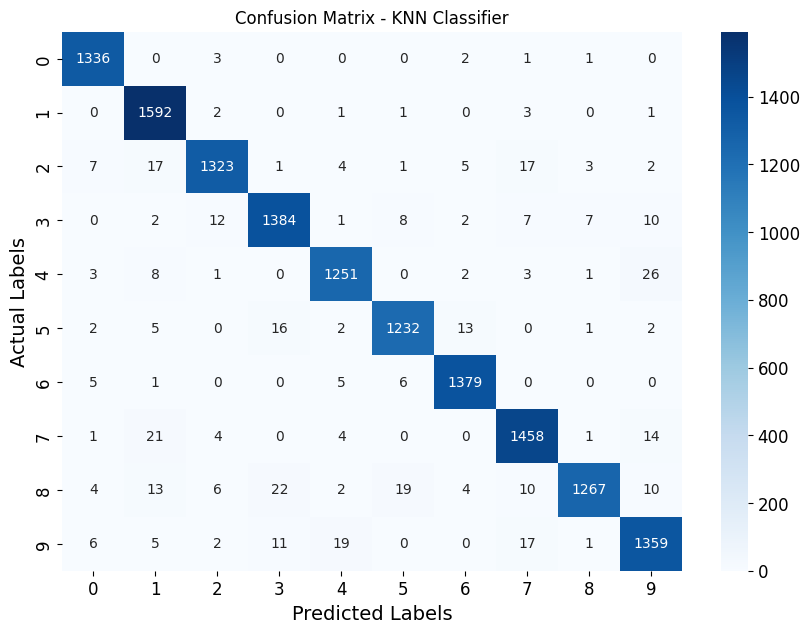

In [10]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - KNN Classifier")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# KNN Hyperparameters Tuning

In [29]:
from sklearn.model_selection import train_test_split

# Use a smaller subset of training data for faster hyperparameter tuning
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance'],

}

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [48]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [49]:
grid_search.best_score_

0.9673928571428572

In [50]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9731428571428572

# KNN After Hyperparam Tuning

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(int)  # Convert target labels to integers

In [2]:
#  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Count the number of instances in each class for the training and testing sets
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Display the counts for each digit (0-9)
print("Training set counts for each class (0-9):")
for digit, count in enumerate(train_counts):
    print(f"Digit {digit}: {count} instances")

print("\nTesting set counts for each class (0-9):")
for digit, count in enumerate(test_counts):
    print(f"Digit {digit}: {count} instances")

Training set counts for each class (0-9):
Digit 0: 5560 instances
Digit 1: 6277 instances
Digit 2: 5610 instances
Digit 3: 5708 instances
Digit 4: 5529 instances
Digit 5: 5040 instances
Digit 6: 5480 instances
Digit 7: 5790 instances
Digit 8: 5468 instances
Digit 9: 5538 instances

Testing set counts for each class (0-9):
Digit 0: 1343 instances
Digit 1: 1600 instances
Digit 2: 1380 instances
Digit 3: 1433 instances
Digit 4: 1295 instances
Digit 5: 1273 instances
Digit 6: 1396 instances
Digit 7: 1503 instances
Digit 8: 1357 instances
Digit 9: 1420 instances


In [5]:
from sklearn.neighbors import KNeighborsClassifier
#  Initialize KNN classifier with specified hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=4, weights='distance')

#  Perform 5-fold cross-validation
cv_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')

In [6]:
# Step 6: Print cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")

Cross-Validation Scores: [0.97133929 0.97285714 0.97330357 0.97223214 0.97125   ]
Mean CV Accuracy: 0.9722
Standard Deviation of CV Accuracy: 0.0008


In [7]:
# Step 7: Train the classifier on the entire training data
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [8]:
# Step 8: Predict on the test set
y_pred = knn_best.predict(X_test)

In [10]:
# Evaluate performance (Accuracy, Classification Report, Confusion Matrix)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy after cross-validation: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))



Test Accuracy after cross-validation: 0.9731

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.96      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



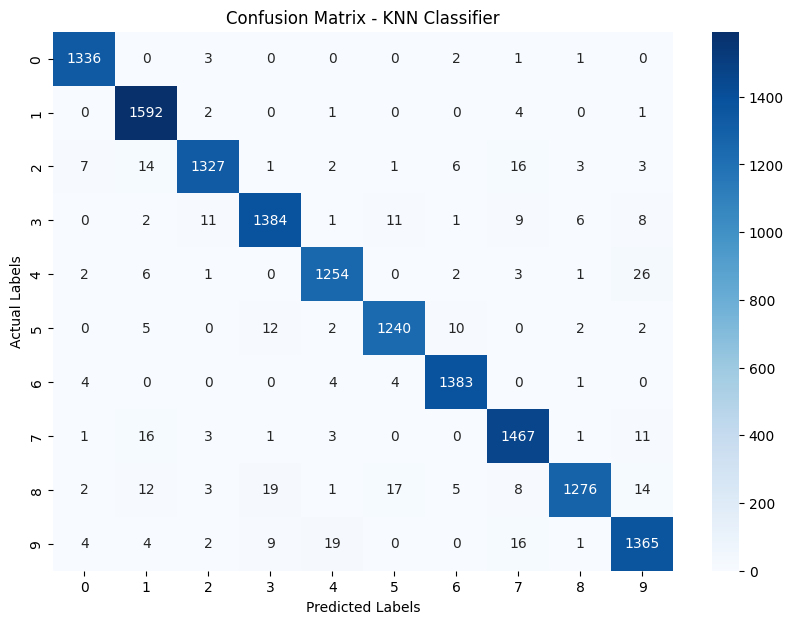

In [9]:
# Confusion matrix
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - KNN Classifier")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Random Forest Classification

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int8)  # Convert labels to integers


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Count the number of instances in each class for the training and testing sets
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Display the counts for each digit (0-9)
print("Training set counts for each class (0-9):")
for digit, count in enumerate(train_counts):
    print(f"Digit {digit}: {count} instances")

print("\nTesting set counts for each class (0-9):")
for digit, count in enumerate(test_counts):
    print(f"Digit {digit}: {count} instances")

Training set counts for each class (0-9):
Digit 0: 5560 instances
Digit 1: 6277 instances
Digit 2: 5610 instances
Digit 3: 5708 instances
Digit 4: 5529 instances
Digit 5: 5040 instances
Digit 6: 5480 instances
Digit 7: 5790 instances
Digit 8: 5468 instances
Digit 9: 5538 instances

Testing set counts for each class (0-9):
Digit 0: 1343 instances
Digit 1: 1600 instances
Digit 2: 1380 instances
Digit 3: 1433 instances
Digit 4: 1295 instances
Digit 5: 1273 instances
Digit 6: 1396 instances
Digit 7: 1503 instances
Digit 8: 1357 instances
Digit 9: 1420 instances


In [13]:
from sklearn.model_selection import cross_val_predict

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

# Train the classifier
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

In [14]:
# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9672857142857143
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



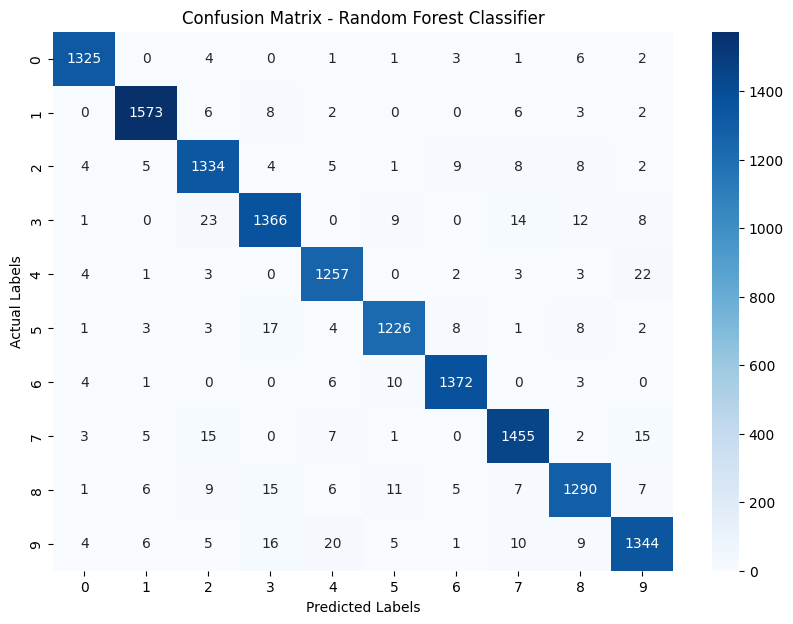

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Plot confusion matrix

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Random Forest Classifier")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# SGD Classifer

In [67]:
from sklearn.linear_model import SGDClassifier
# Create an SGD classifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Train the classifier
sgd_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_sgd = sgd_clf.predict(X_test)

In [68]:
# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}")
print(classification_report(y_test, y_pred_sgd))


Accuracy: 0.8717142857142857
              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1343
           1       0.96      0.98      0.97      1600
           2       0.84      0.88      0.86      1380
           3       0.88      0.84      0.86      1433
           4       0.97      0.71      0.82      1295
           5       0.84      0.84      0.84      1273
           6       0.92      0.95      0.94      1396
           7       0.88      0.94      0.91      1503
           8       0.84      0.74      0.79      1357
           9       0.69      0.90      0.78      1420

    accuracy                           0.87     14000
   macro avg       0.88      0.87      0.87     14000
weighted avg       0.88      0.87      0.87     14000



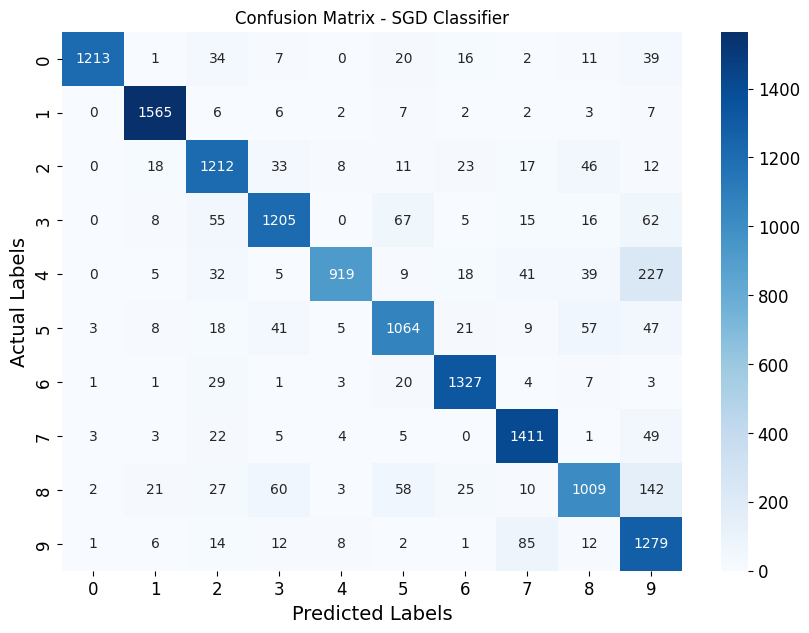

In [69]:
# Confusion matrix
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_sgd, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SGD Classifier")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# SVM Classifier

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])

# Train the classifier
svm_clf.fit(X_train, y_train)



In [ ]:
# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

In [ ]:
# Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

In [ ]:
# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - SVM Classifier")
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Precision-Recall Plot for KNN

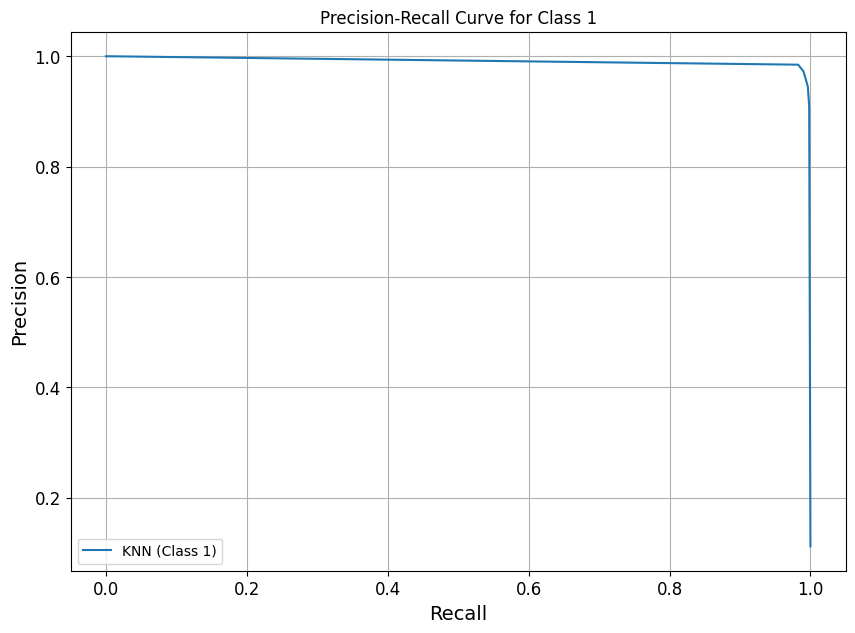

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Plot Precision-Recall Curve for a specific class
def plot_precision_recall_curve_for_classifier(clf, X_train, y_train, label, target_class=1):
    # Predict probabilities or decision function scores with cross_val_predict
    if hasattr(clf, "predict_proba"):
        # Get probability estimates using cross-validation
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="predict_proba")[:, target_class]
    else:
        # Get decision function scores using cross-validation
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="decision_function")

    # Convert y_train to a binary format for the specific class (1 vs all)
    y_train_binary = (y_train == target_class).astype(int)

    # Compute precision and recall values at different thresholds
    precision, recall, thresholds = precision_recall_curve(y_train_binary, y_scores)

    # Plot Precision-Recall Curve for the specified class
    plt.plot(recall, precision, label=f"{label} (Class {target_class})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for Class {target_class}")
    plt.grid(True)
    plt.legend()

# Example: Plot Precision-Recall Curve for KNN for class '1'
plt.figure(figsize=(10, 7))
plot_precision_recall_curve_for_classifier(knn, X_train, y_train, label="KNN", target_class=1)
plt.show()


In [ ]:
some_digit = X.iloc[0] # Access the first row using iloc
#some_digit = X.loc[0] # Alternatively, if 0 is an actual index, use loc

# Use predict_proba to get prediction probabilities
y_scores = knn.predict_proba([some_digit])
y_scores

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([[False, False, False,  True, False,  True, False, False, False,
        False]])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
y_scores = cross_val_predict(knn, X_train, y_train, cv=3,
                             method="predict_proba")

In [ ]:
from sklearn.metrics import precision_recall_curve

# Select one class for binary classification
y_train_some_digit = (y_train == 5)  # Example: Consider class 5

# Get scores for the selected class
y_scores_some_digit = y_scores[:, 5]  # Example: Scores for class 5

precisions, recalls, thresholds = precision_recall_curve(y_train_some_digit, y_scores_some_digit)

Saving figure precision_recall_vs_threshold_plot


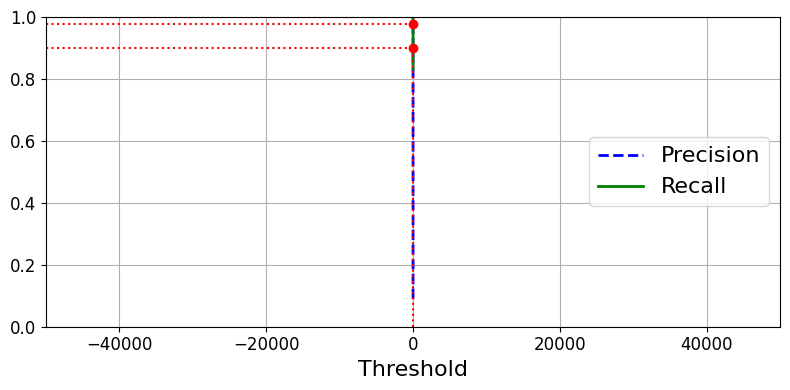

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

# Precision-Recall Plot for Random Forest

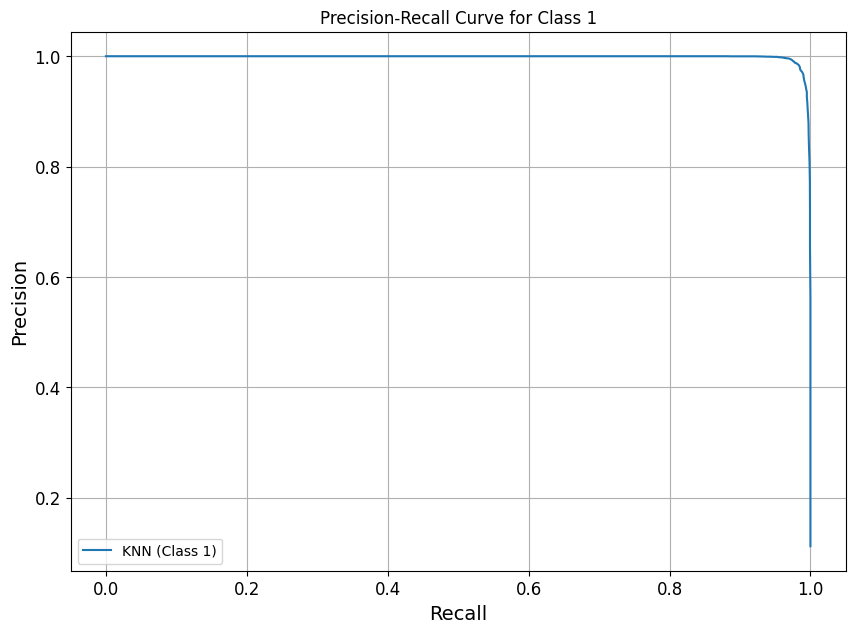

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Plot Precision-Recall Curve for a specific class
def plot_precision_recall_curve_for_classifier(clf, X_train, y_train, label, target_class=1):
    # Predict probabilities or decision function scores with cross_val_predict
    if hasattr(clf, "predict_proba"):
        # Get probability estimates using cross-validation
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="predict_proba")[:, target_class]
    else:
        # Get decision function scores using cross-validation
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="decision_function")

    # Convert y_train to a binary format for the specific class (1 vs all)
    y_train_binary = (y_train == target_class).astype(int)

    # Compute precision and recall values at different thresholds
    precision, recall, thresholds = precision_recall_curve(y_train_binary, y_scores)

    # Plot Precision-Recall Curve for the specified class
    plt.plot(recall, precision, label=f"{label} (Class {target_class})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for Class {target_class}")
    plt.grid(True)
    plt.legend()

# Example: Plot Precision-Recall Curve for KNN for class '1'
plt.figure(figsize=(10, 7))
plot_precision_recall_curve_for_classifier(rf_clf, X_train, y_train, label="Random Forest", target_class=1)
plt.show()


In [ ]:
some_digit = X.iloc[0] # Access the first row using iloc
#some_digit = X.loc[0] # Alternatively, if 0 is an actual index, use loc

# Use predict_proba to get prediction probabilities
y_scores = rf_clf.predict_proba([some_digit])
y_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.01, 0.02, 0.14, 0.01, 0.82, 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([[False,  True,  True,  True,  True,  True, False, False, False,
        False]])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
y_scores = cross_val_predict(rf_clf, X_train, y_train, cv=3,
                             method="predict_proba")

In [ ]:
from sklearn.metrics import precision_recall_curve

# Select one class for binary classification
y_train_some_digit = (y_train == 5)  # Example: Consider class 5

# Get scores for the selected class
y_scores_some_digit = y_scores[:, 5]  # Example: Scores for class 5

precisions, recalls, thresholds = precision_recall_curve(y_train_some_digit, y_scores_some_digit)

Saving figure precision_recall_vs_threshold_plot


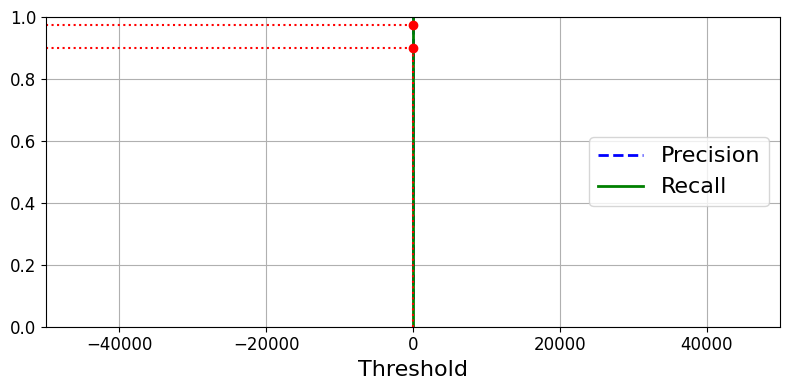

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

# Precision-Recall Plot for SGD

In [ ]:
some_digit = X.iloc[0] # Access the first row using iloc
#some_digit = X.loc[0] # Alternatively, if 0 is an actual index, use loc

y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-26085.64727654, -34697.24119489,  -4999.4080465 ,
         -1321.53612655, -32246.85587597,   3043.42604314,
        -34493.76916172, -14768.60116179, -10960.21273805,
         -4766.34319641]])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([[False, False, False, False, False,  True, False, False, False,
        False]])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

# Select one class for binary classification
y_train_some_digit = (y_train == 5)  # Example: Consider class 5

# Get scores for the selected class
y_scores_some_digit = y_scores[:, 5]  # Example: Scores for class 5

precisions, recalls, thresholds = precision_recall_curve(y_train_some_digit, y_scores_some_digit)

Saving figure precision_recall_vs_threshold_plot


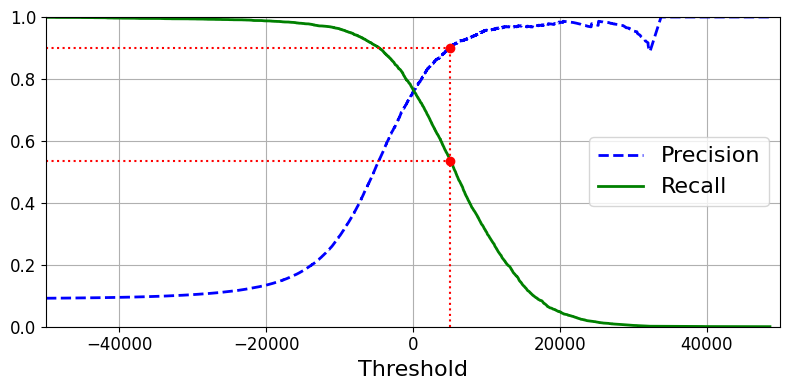

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

# Recall

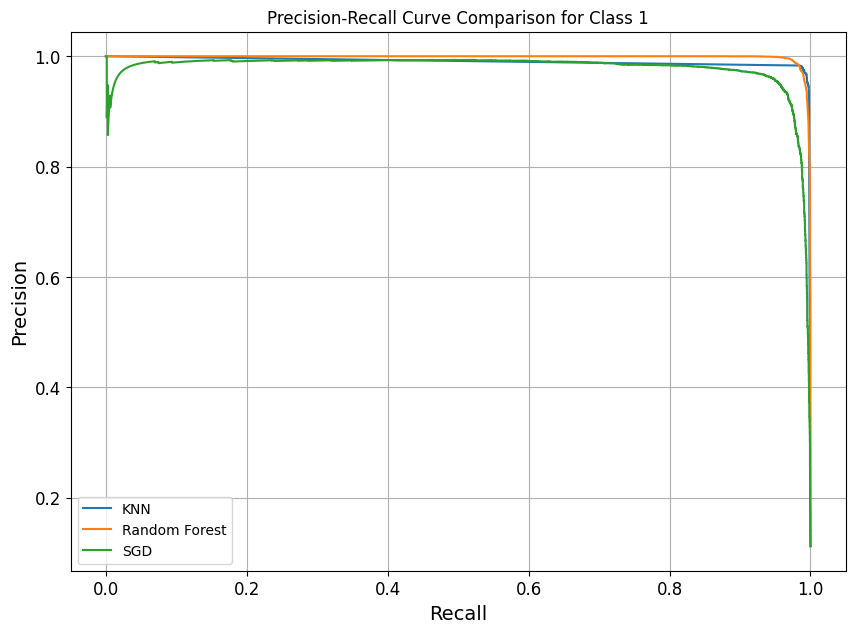

In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Plot Precision-Recall Curves for a specific class
def plot_precision_recall_curve_for_classifier(clf, X_train, y_train, label, target_class=1):
    # Predict probabilities or decision function scores with cross_val_predict
    if hasattr(clf, "predict_proba"):
        # Get probability estimates using cross-validation for the specific class
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="predict_proba")[:, target_class]
    else:
        # Get decision function scores using cross-validation
        y_scores = cross_val_predict(clf, X_train, y_train, cv=5, method="decision_function")
        #Added this line to convert the multiclass output to binary output
        y_scores = y_scores[:,target_class]

    # Convert y_train to a binary format for the specific class (1 vs all)
    y_train_binary = (y_train == target_class).astype(int)

    # Compute precision and recall values at different thresholds
    precision, recall, thresholds = precision_recall_curve(y_train_binary, y_scores)

    # Plot Precision-Recall Curve for the specified class
    plt.plot(recall, precision, label=label)

# Prepare the classifiers
knn_best = KNeighborsClassifier(n_neighbors=4, weights='distance')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3, random_state=42)

# Plot Precision-Recall Curves for KNN, Random Forest, and SGD Classifier for class '1'
plt.figure(figsize=(10, 7))

plot_precision_recall_curve_for_classifier(knn_best, X_train, y_train, label="KNN", target_class=1)
plot_precision_recall_curve_for_classifier(rf_clf, X_train, y_train, label="Random Forest", target_class=1)
plot_precision_recall_curve_for_classifier(sgd_clf, X_train, y_train, label="SGD", target_class=1)

# Configure plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison for Class 1")
plt.grid(True)
plt.legend()
plt.show()